## Download the kaggle dataset and put it in ./data/

[Dataset](https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset/download?datasetVersionNumber=1)

In [2]:
import zipfile
import os
import shutil

zip_location = './data/archive.zip'
extract_to = './data/'

with zipfile.ZipFile(zip_location, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


#os.remove("./data/archive.zip")
shutil.rmtree('./data/AugmentedAlzheimerDataset')


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from pathlib import Path
import os.path

In [11]:
data_dir = Path('./data/OriginalDataset/');

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=360,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
) # set validation split

train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,

    class_mode='categorical',
    subset='training')

test_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


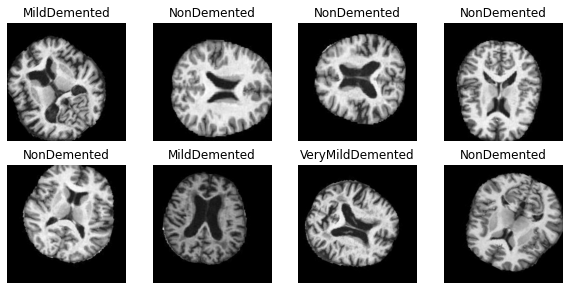

In [13]:
# Show the first 8 images and labels from the training set

plt.figure(figsize=(10, 10))
batch = train_ds.next()
for i in range(0, 8):
    image = batch[0][i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    labelIndex = list(batch[1][i]).index(1)
    # get the corresponding label from the train_ds.class_indices
    labels = list(train_ds.class_indices.keys())
    label = labels[labelIndex]
    plt.title(label)
    plt.axis('off')






In [18]:
MobileNetV3Small = keras.applications.MobileNetV3Small(
	input_shape=(224, 224, 3),
	include_top=False, 
	weights='imagenet')

# Create the model

model = keras.Sequential()

for layer in MobileNetV3Small.layers[:-10]:
	layer.trainable = False

model.add(MobileNetV3Small)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 28224)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               14451200  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                      

In [21]:
# Compile the model

model.compile(
	optimizer=keras.optimizers.Adam(learning_rate=0.0001),
	metrics=['accuracy'],
	loss='binary_crossentropy',
)

# Train the model
history = model.fit(
	train_ds,
	epochs=20, 
	steps_per_epoch=len(train_ds),
	validation_data=test_ds,
)


Epoch 1/20
850/850 [==============================] - 31s 32ms/step - loss: 0.3868 - accuracy: 0.5878 - val_loss: 0.3743 - val_accuracy: 0.5552
Epoch 2/20
850/850 [==============================] - 26s 31ms/step - loss: 0.3818 - accuracy: 0.5965 - val_loss: 0.3590 - val_accuracy: 0.6115
Epoch 3/20
850/850 [==============================] - 26s 31ms/step - loss: 0.3806 - accuracy: 0.5995 - val_loss: 0.3750 - val_accuracy: 0.5984
Epoch 4/20
850/850 [==============================] - 27s 31ms/step - loss: 0.3791 - accuracy: 0.6014 - val_loss: 0.3725 - val_accuracy: 0.5773
Epoch 5/20
850/850 [==============================] - 27s 32ms/step - loss: 0.3778 - accuracy: 0.6039 - val_loss: 0.3796 - val_accuracy: 0.5464
Epoch 6/20
850/850 [==============================] - 27s 31ms/step - loss: 0.3775 - accuracy: 0.6031 - val_loss: 0.3605 - val_accuracy: 0.6171
Epoch 7/20
850/850 [==============================] - 27s 32ms/step - loss: 0.3746 - accuracy: 0.6064 - val_loss: 0.3544 - val_accuracy:

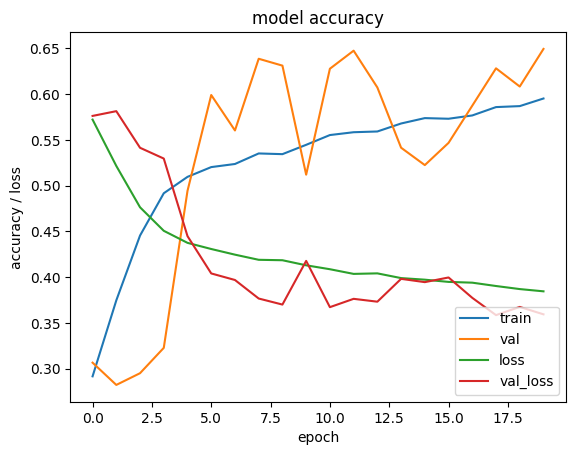

In [20]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'loss', 'val_loss'], loc='lower right')
plt.show()

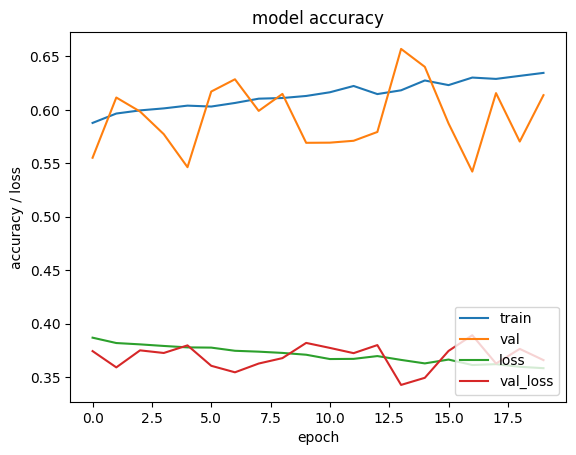

In [22]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'loss', 'val_loss'], loc='lower right')
plt.show()

In [23]:
# Make all of the model layers trainable
for layer in model.layers:
	layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(0.000001),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(
  train_ds,
  epochs=20,
  steps_per_epoch=len(train_ds),
  validation_data=test_ds,
)

Epoch 1/20


/home/james/.local/lib/python3.10/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


822/850 [============================>.] - ETA: 1s - loss: 20.6791 - accuracy: 0.2851

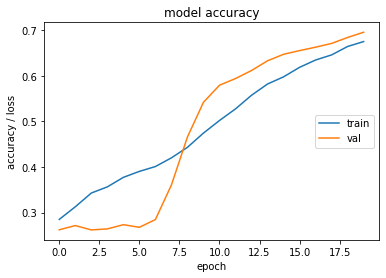

In [ ]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
"""plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])"""
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')#, 'loss', 'val_loss'
plt.show()

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 flatten_17 (Flatten)        (None, 47040)             0         
                                                                 
 dense_48 (Dense)            (None, 512)               24084992  
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                     

In [ ]:
# Save the model
model.save('./model-v3Large')

INFO:tensorflow:Assets written to: ./model-v3Large\assets


INFO:tensorflow:Assets written to: ./model-v3Large\assets


1/1 [==============================] - 0s 24ms/step


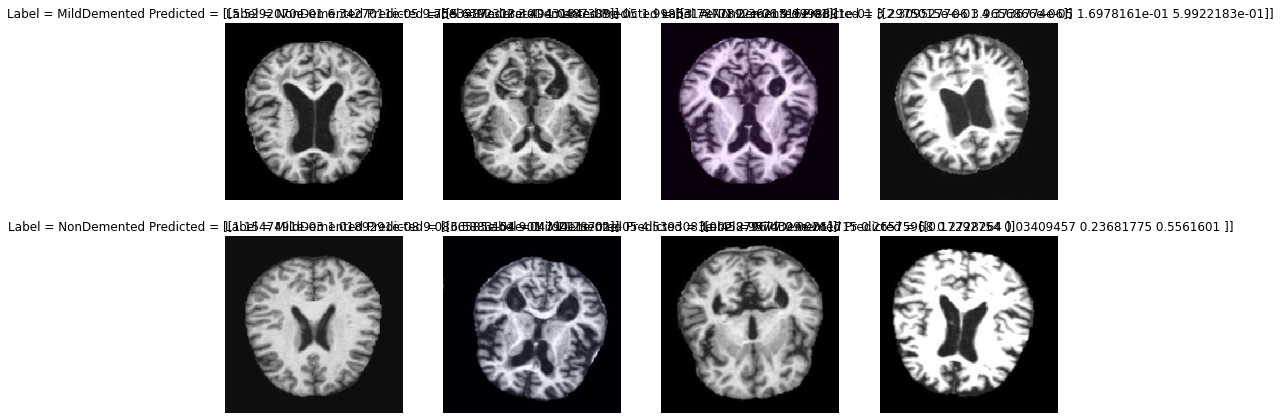

In [ ]:
# Check the accuracy across the 4 classes

plt.figure(figsize=(15, 15))
batch = train_ds.next()
for i in range(0, 8):
    image = batch[0][i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    labelIndex = list(batch[1][i]).index(1)
    # get the corresponding label from the train_ds.class_indices
    labels = list(train_ds.class_indices.keys())
    label = labels[labelIndex]
    predicted = model.predict(image.reshape(1,224,224,3))
    plt.title("Label = " + label + " Predicted = " + str(predicted))
    plt.axis('off')



In [ ]:
# Create a new model from scratch

"""model = keras.Sequential([
	keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
	keras.layers.MaxPooling2D(),
	keras.layers.Conv2D(64, 3, activation='relu'),
	keras.layers.MaxPooling2D(),
	keras.layers.Flatten(),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])"""
"""
# Resize the test and train image data
test_ds_scaled = test_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
train_ds_scaled = train_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))

model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(train_ds_scaled,
    validation_data=test_ds_scaled,
    epochs=10)"""

"\n# Resize the test and train image data\ntest_ds_scaled = test_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))\ntrain_ds_scaled = train_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))\n\nmodel = tf.keras.models.Sequential([\n    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),\n    keras.layers.MaxPooling2D(2,2),\n    keras.layers.Conv2D(32, (3,3), activation = 'relu'),\n    keras.layers.MaxPooling2D(2,2),\n    keras.layers.Conv2D(32, (3,3), activation = 'relu'),\n    keras.layers.MaxPooling2D(2,2),\n    keras.layers.Conv2D(32, (3,3), activation = 'relu'),\n    keras.layers.MaxPooling2D(2,2),\n    keras.layers.Flatten(),\n    keras.layers.Dense(512, activation = 'relu'),\n    keras.layers.Dropout(0.2),\n    keras.layers.Dense(1, activation = 'softmax')\n])\nmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])\nhistory = model.fit(train_ds_scaled,\n    validation_data=test_ds_